In [1]:
import glob
from pycaret.classification import *
import pandas as pd
import os



In [2]:
raw = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_2023-04-13_16-59-47_test.csv')
raw['link'] = raw['ground_truth'].apply(lambda x: 1 if x != 'no_link_known' else 0)
test = raw.drop(columns=['ground_truth'])  


In [3]:
raw

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ground_truth,link
0,0.143444,0.093716,-0.137825,-0.124671,-0.096162,0.134430,0.258746,-0.316311,0.063991,-0.294353,...,-0.018314,-0.036506,0.058785,0.032657,0.068184,-0.035997,-0.134148,0.025432,http://www.semanticweb.org/needed-terms#009,1
1,0.018331,0.045232,0.001957,0.000281,-0.007401,0.909883,0.018149,-0.002059,0.016732,-0.009270,...,0.026533,-0.035074,-0.007182,0.016385,0.017070,-0.040005,-0.024660,-0.013184,http://www.semanticweb.org/needed-terms#009,1
2,0.004819,0.054722,0.001181,0.086243,0.076688,0.046515,0.041210,-0.023142,0.060256,-0.125768,...,0.041565,-0.049319,-0.046994,0.046374,0.048004,-0.061171,0.001339,-0.120643,http://www.semanticweb.org/needed-terms#002,1
3,-0.049837,-0.037773,0.039730,-0.042049,-0.032324,-0.035344,0.037563,-0.021121,-0.032801,-0.031846,...,0.026903,-0.041563,0.005378,0.066259,0.040746,-0.047484,-0.029613,-0.017699,http://www.semanticweb.org/needed-terms#001,1
4,0.088384,0.012557,-0.111223,-0.101479,-0.090372,-0.079046,-0.071125,-0.055374,-0.095753,0.117984,...,-0.038869,-0.055369,0.045610,-0.033408,0.062304,-0.035480,-0.049748,-0.004965,no_link_known,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233779,0.028791,0.064465,0.016604,-0.005840,-0.009796,0.008425,0.013725,-0.001496,-0.007599,-0.075763,...,0.102976,-0.020468,-0.024157,-0.978574,0.016163,0.027392,-0.110037,-0.073671,no_link_known,0
233780,-0.004770,-0.048431,0.002252,-0.001596,-0.046143,-0.110508,-0.025915,0.009208,0.006273,0.032961,...,-0.086243,0.064273,-0.023515,-0.043269,-0.097919,0.059382,0.175372,0.076994,no_link_known,0
233781,0.027764,0.056585,-0.033077,-0.022086,-0.067494,-0.015891,-0.032308,0.012968,0.015531,-0.080184,...,0.101561,-0.006042,-0.104236,0.101335,-0.052880,0.089030,0.016790,-0.083716,no_link_known,0
233782,0.078459,0.079812,-0.076346,-0.083066,-0.081467,-0.066998,-0.050276,-0.002377,-0.093573,-0.045859,...,0.069637,-0.038760,0.034591,0.018672,0.037403,-0.031772,-0.048327,-0.011563,http://semanticscience.org/resource/SIO_001279,1


In [4]:
files = glob.glob('/home/antoine/gene_pheno_pred/models_classif/convkb/binary_emb_val/*')

In [14]:
for model in files[:1]:
    model = model.split('.pkl')[0]
    loaded_model = load_model(model)
    setup(test, target='link')
    print(loaded_model)
    predictions = predict_model(loaded_model, data=test)
    predictions.head()

,Description,Value
0,Session id,4305
1,Target,link
2,Target type,Binary
3,Original data shape,"(233784, 101)"
4,Transformed data shape,"(233784, 101)"
5,Transformed train set shape,"(163648, 101)"
6,Transformed test set shape,"(70136, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feat...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='s

In [15]:
predictions['prediction_label'] = predictions['prediction_label'].replace({1: 0, 0: 1})
predictions

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,link,prediction_label,prediction_score
0,0.143444,0.093716,-0.137825,-0.124671,-0.096162,0.134430,0.258746,-0.316311,0.063991,-0.294353,...,-0.036506,0.058785,0.032657,0.068184,-0.035997,-0.134148,0.025432,1,0,0.5559
1,0.018331,0.045232,0.001957,0.000281,-0.007401,0.909883,0.018149,-0.002059,0.016732,-0.009270,...,-0.035074,-0.007182,0.016385,0.017070,-0.040005,-0.024660,-0.013184,1,1,0.7032
2,0.004819,0.054722,0.001181,0.086243,0.076688,0.046515,0.041210,-0.023142,0.060256,-0.125768,...,-0.049319,-0.046994,0.046374,0.048004,-0.061171,0.001339,-0.120643,1,1,0.7773
3,-0.049837,-0.037773,0.039730,-0.042049,-0.032324,-0.035344,0.037563,-0.021121,-0.032801,-0.031846,...,-0.041563,0.005378,0.066259,0.040746,-0.047484,-0.029613,-0.017699,1,1,0.7128
4,0.088384,0.012557,-0.111223,-0.101479,-0.090372,-0.079046,-0.071125,-0.055374,-0.095753,0.117984,...,-0.055369,0.045610,-0.033408,0.062304,-0.035480,-0.049748,-0.004965,0,0,0.6289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233779,0.028791,0.064465,0.016604,-0.005840,-0.009796,0.008425,0.013725,-0.001496,-0.007599,-0.075763,...,-0.020468,-0.024157,-0.978574,0.016163,0.027392,-0.110037,-0.073671,0,0,0.5791
233780,-0.004770,-0.048431,0.002252,-0.001596,-0.046143,-0.110508,-0.025915,0.009208,0.006273,0.032961,...,0.064273,-0.023515,-0.043269,-0.097919,0.059382,0.175372,0.076994,0,0,0.9976
233781,0.027764,0.056585,-0.033077,-0.022086,-0.067494,-0.015891,-0.032308,0.012968,0.015531,-0.080184,...,-0.006042,-0.104236,0.101335,-0.052880,0.089030,0.016790,-0.083716,0,0,0.9947
233782,0.078459,0.079812,-0.076346,-0.083066,-0.081467,-0.066998,-0.050276,-0.002377,-0.093573,-0.045859,...,-0.038760,0.034591,0.018672,0.037403,-0.031772,-0.048327,-0.011563,1,1,0.7302


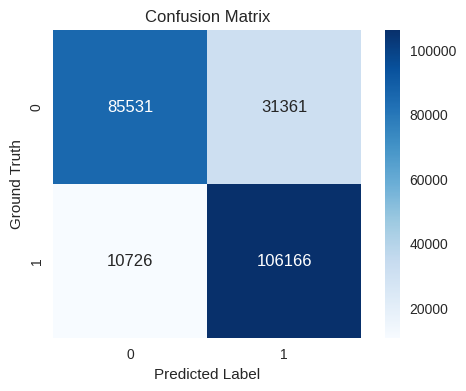

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
ground_truth = predictions['link'].values
pred = predictions['prediction_label'].values

# Create a confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(ground_truth, pred)

# Set the labels for the confusion matrix
labels = ['0', '1']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth')

plt.show()

In [18]:
# Calc accuracy
accuracy = (pred == ground_truth).mean() * 100

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 82.00%


In [20]:
multiclass_df = pd.concat([predictions['prediction_label'], raw['ground_truth']], axis=1)
multiclass_df.columns = ['prediction_label', 'ground_truth']
multiclass_df

,prediction_label,ground_truth
0,0,http://www.semanticweb.org/needed-terms#009
1,1,http://www.semanticweb.org/needed-terms#009
2,1,http://www.semanticweb.org/needed-terms#002
3,1,http://www.semanticweb.org/needed-terms#001
4,0,no_link_known
...,...,...
233779,0,no_link_known
233780,0,no_link_known
233781,0,no_link_known
233782,1,http://semanticscience.org/resource/SIO_001279


In [43]:
# Calculate the confusion matrix for each type of link
import sklearn.metrics
link_types = multiclass_df['ground_truth'].unique()
for link_type in link_types:
    subset = multiclass_df[multiclass_df['ground_truth'] == link_type]
    y_true = subset['ground_truth'] if link_type != 'no_link_known' else subset['prediction_label']
    y_pred = subset['prediction_label']
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_true, y_pred).ravel()

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['http://www.semanticweb.org/needed-terms#009'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [31]:
confusion_matrix = pd.crosstab(multiclass_df['prediction_label'], multiclass_df['ground_truth'])
# confusion_matrix = confusion_matrix.drop(columns=['no_link_known'])
confusion_matrix

ground_truth,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,no_link_known
prediction_label,,,,,,,,,,
0,1580,0,930,6331,198,192,374,38,1083,85531
1,23521,4490,8499,46600,6943,6669,1990,3501,3953,31361


0 0.9370543006254731
1 1.0
2 0.9013681196309259
3 0.8803914530237479
4 0.9722727909256407
5 0.9720157411456056
6 0.8417935702199661
7 0.9892625035320712
8 0.7849483717235901
9 0.26829038770831193


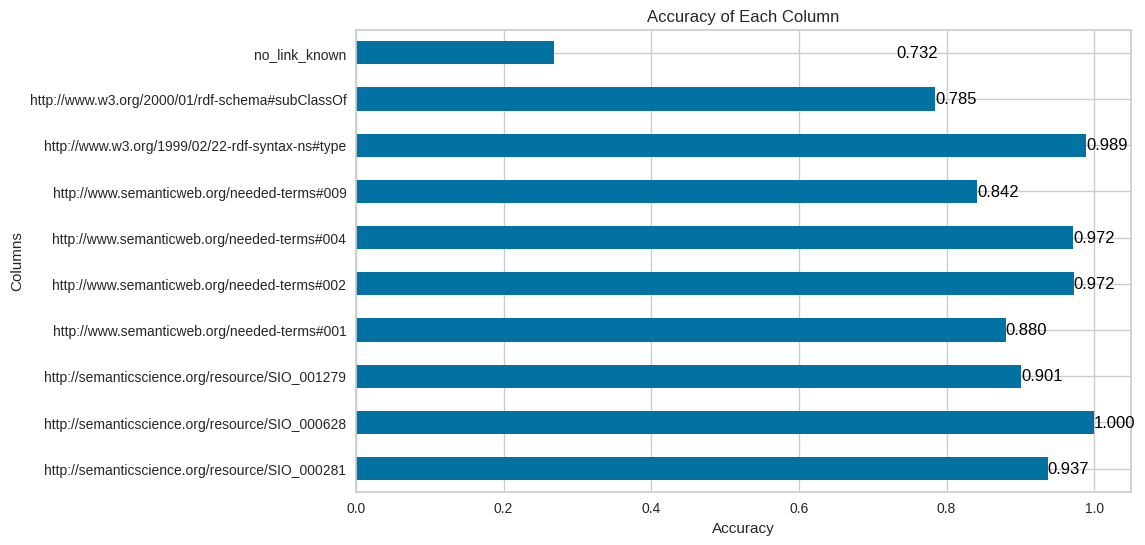

In [41]:
# Assuming the provided DataFrame is called 'confusion_matrix_df'
# Extract the true positives (row 1) and true negatives (row 0)
true_positives = confusion_matrix.loc[1]
true_negatives = confusion_matrix.loc[0]

# Calculate the total counts for true positives and true negatives
total_true_positives = true_positives.sum()
total_true_negatives = true_negatives.sum()

# Calculate the accuracy for each column
accuracies = true_positives / (true_positives + true_negatives)


# Create the plot
plt.figure(figsize=(10, 6))
accuracies.plot(kind='barh')
plt.xlabel('Accuracy')
plt.ylabel('Columns')
plt.title('Accuracy of Each Column')

# Add the accuracy values as text on the bars
for i, v in enumerate(accuracies):
    print(i,v)
    if i == len(accuracies) - 1:
        v = 1 - v
    plt.text(v, i, f'{v:.3f}', color='black', va='center')

plt.show()

In [35]:
1-0.2683

0.7317